In [1]:
import pandas as pd
ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/O2023_MCD3735A/Módulo 4 - Codificación de variables categóricas/'
df=pd.read_csv('Países.csv')
df.head(21)

,Países
0,MEX
1,CHN
2,CAN
3,POL
4,CPV
5,PHL
6,EGY
7,PHL
8,FIN
9,ITA


In [2]:
# Cardinalidad de 'Paises'
n=len(df['Países'].unique())
n

91

In [3]:
round(0.2*n)

18

In [4]:
0.8*len(df)

448.0

<AxesSubplot:>

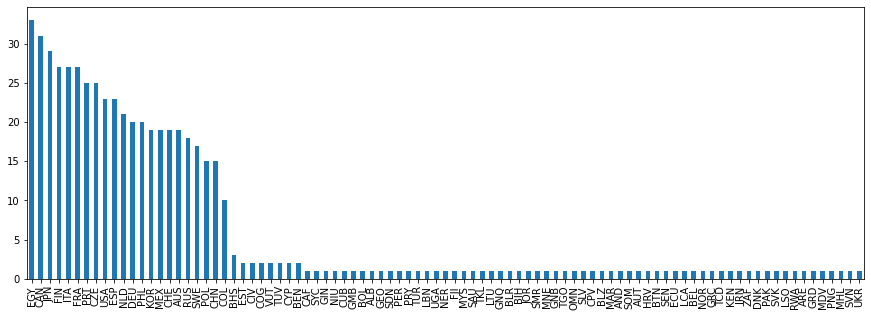

In [5]:
conteo_paises=df['Países'].value_counts()
conteo_paises.plot.bar(figsize=(15,5))

<AxesSubplot:>

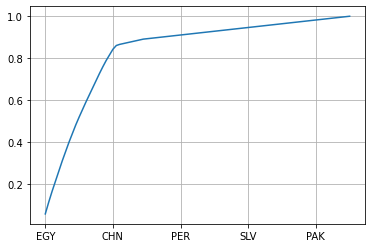

In [6]:
suma_paises=conteo_paises.cumsum()
(suma_paises/len(df)).plot(grid=True)

In [7]:
n_obs=len(df)
0.8*n_obs

448.0

In [8]:
suma_paises.iloc[18]

442

In [9]:
suma_paises.iloc[19]/n_obs

0.8160714285714286

In [10]:
conteo_paises.index[19]

'POL'

In [11]:
suma_paises.index[19]

'POL'

# Feature hashing (Hashing trick)

In [12]:
m=20

In [13]:
#@title Función Hash para representar la frecuencia
contador=[0]*m # Contador con 'm' ceros

In [14]:
# Codificacion
keys={pais:ID for pais,ID in zip(conteo_paises.index,range(n))}
keys

{'EGY': 0,
 'CAN': 1,
 'JPN': 2,
 'FIN': 3,
 'ITA': 4,
 'FRA': 5,
 'PRT': 6,
 'CZE': 7,
 'USA': 8,
 'ESP': 9,
 'NLD': 10,
 'DEU': 11,
 'PHL': 12,
 'KOR': 13,
 'MEX': 14,
 'CHE': 15,
 'AUS': 16,
 'RUS': 17,
 'SWE': 18,
 'POL': 19,
 'CHN': 20,
 'COL': 21,
 'BHS': 22,
 'EST': 23,
 'CIV': 24,
 'COG': 25,
 'VUT': 26,
 'TUV': 27,
 'CYP': 28,
 'BEN': 29,
 'CAF': 30,
 'SYC': 31,
 'GIN': 32,
 'NIU': 33,
 'CUB': 34,
 'GMB': 35,
 'BOL': 36,
 'ALB': 37,
 'GEO': 38,
 'SDN': 39,
 'PER': 40,
 'PRY': 41,
 'TUR': 42,
 'LBN': 43,
 'UGA': 44,
 'NER': 45,
 'FJI': 46,
 'MYS': 47,
 'SAU': 48,
 'TKL': 49,
 'LTU': 50,
 'GNQ': 51,
 'BLR': 52,
 'BIH': 53,
 'JOR': 54,
 'SMR': 55,
 'MNE': 56,
 'GNB': 57,
 'TGO': 58,
 'OMN': 59,
 'SLV': 60,
 'CPV': 61,
 'BLZ': 62,
 'MAR': 63,
 'AND': 64,
 'SOM': 65,
 'AUT': 66,
 'HRV': 67,
 'BTN': 68,
 'SEN': 69,
 'ECU': 70,
 'LCA': 71,
 'BEL': 72,
 'NOR': 73,
 'GRC': 74,
 'TCD': 75,
 'KEN': 76,
 'IRN': 77,
 'ZAF': 78,
 'DNK': 79,
 'PAK': 80,
 'SVK': 81,
 'LSO': 82,
 'RWA': 83,
 '

In [15]:
for pais,ID in keys.items():
  contador[ID%m] += conteo_paises.loc[pais]
contador

[51,
 44,
 35,
 32,
 32,
 32,
 30,
 30,
 28,
 28,
 25,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 20,
 18]

In [16]:
hash_cod={pais:contador[ID%m] for pais,ID in keys.items()}
hash_cod

{'EGY': 51,
 'CAN': 44,
 'JPN': 35,
 'FIN': 32,
 'ITA': 32,
 'FRA': 32,
 'PRT': 30,
 'CZE': 30,
 'USA': 28,
 'ESP': 28,
 'NLD': 25,
 'DEU': 23,
 'PHL': 23,
 'KOR': 22,
 'MEX': 22,
 'CHE': 22,
 'AUS': 22,
 'RUS': 21,
 'SWE': 20,
 'POL': 18,
 'CHN': 51,
 'COL': 44,
 'BHS': 35,
 'EST': 32,
 'CIV': 32,
 'COG': 32,
 'VUT': 30,
 'TUV': 30,
 'CYP': 28,
 'BEN': 28,
 'CAF': 25,
 'SYC': 23,
 'GIN': 23,
 'NIU': 22,
 'CUB': 22,
 'GMB': 22,
 'BOL': 22,
 'ALB': 21,
 'GEO': 20,
 'SDN': 18,
 'PER': 51,
 'PRY': 44,
 'TUR': 35,
 'LBN': 32,
 'UGA': 32,
 'NER': 32,
 'FJI': 30,
 'MYS': 30,
 'SAU': 28,
 'TKL': 28,
 'LTU': 25,
 'GNQ': 23,
 'BLR': 23,
 'BIH': 22,
 'JOR': 22,
 'SMR': 22,
 'MNE': 22,
 'GNB': 21,
 'TGO': 20,
 'OMN': 18,
 'SLV': 51,
 'CPV': 44,
 'BLZ': 35,
 'MAR': 32,
 'AND': 32,
 'SOM': 32,
 'AUT': 30,
 'HRV': 30,
 'BTN': 28,
 'SEN': 28,
 'ECU': 25,
 'LCA': 23,
 'BEL': 23,
 'NOR': 22,
 'GRC': 22,
 'TCD': 22,
 'KEN': 22,
 'IRN': 21,
 'ZAF': 20,
 'DNK': 18,
 'PAK': 51,
 'SVK': 44,
 'LSO': 35,
 'RW

In [17]:
df['Hash_1']=df['Países'].map(hash_cod)
df['Hash_1'].value_counts()

32    96
22    88
30    60
28    56
51    51
23    46
44    44
35    35
25    25
21    21
20    20
18    18
Name: Hash_1, dtype: int64

In [18]:
# Otra forma de asociacion
keys={pais:ID for pais,ID in zip(df['Países'].unique(),range(n))}
keys

{'MEX': 0,
 'CHN': 1,
 'CAN': 2,
 'POL': 3,
 'CPV': 4,
 'PHL': 5,
 'EGY': 6,
 'FIN': 7,
 'ITA': 8,
 'AUS': 9,
 'CZE': 10,
 'BLZ': 11,
 'FRA': 12,
 'RUS': 13,
 'MAR': 14,
 'ESP': 15,
 'CIV': 16,
 'AND': 17,
 'SOM': 18,
 'CHE': 19,
 'AUT': 20,
 'BHS': 21,
 'JPN': 22,
 'PRT': 23,
 'KOR': 24,
 'COL': 25,
 'USA': 26,
 'NLD': 27,
 'HRV': 28,
 'SWE': 29,
 'DEU': 30,
 'BEN': 31,
 'BTN': 32,
 'SEN': 33,
 'ECU': 34,
 'LCA': 35,
 'BEL': 36,
 'NOR': 37,
 'GRC': 38,
 'TCD': 39,
 'KEN': 40,
 'IRN': 41,
 'CYP': 42,
 'ZAF': 43,
 'DNK': 44,
 'TGO': 45,
 'PAK': 46,
 'SVK': 47,
 'LSO': 48,
 'RWA': 49,
 'ARE': 50,
 'GRD': 51,
 'MDV': 52,
 'PNG': 53,
 'MHL': 54,
 'SVN': 55,
 'SLV': 56,
 'OMN': 57,
 'TUV': 58,
 'GNB': 59,
 'PER': 60,
 'SDN': 61,
 'GEO': 62,
 'ALB': 63,
 'BOL': 64,
 'GMB': 65,
 'CUB': 66,
 'GIN': 67,
 'VUT': 68,
 'COG': 69,
 'SYC': 70,
 'CAF': 71,
 'PRY': 72,
 'LBN': 73,
 'UGA': 74,
 'NER': 75,
 'TUR': 76,
 'MYS': 77,
 'SAU': 78,
 'TKL': 79,
 'EST': 80,
 'LTU': 81,
 'GNQ': 82,
 'BLR': 83,
 '

In [19]:
contador=[0]*m
for pais,ID in keys.items():
  contador[ID%m] += conteo_paises.loc[pais]
contador

[24, 21, 64, 43, 23, 33, 59, 51, 32, 40, 48, 5, 30, 21, 4, 26, 5, 4, 5, 22]

In [20]:
#@title Función MurmurHash3 de 32 bits
from sklearn.feature_extraction import FeatureHasher

In [21]:
hasher=FeatureHasher(m)
m_paises=hasher.transform([keys])
m_paises

<1x20 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [22]:
m_paises.toarray()

array([[ -79.,   60.,  148.,    5.,   -7., -222.,  178.,  -74.,   40.,
        -103.,  -18.,  -63.,   85., -112.,  262.,   50.,  -50., -174.,
          -5.,  274.]])

In [23]:
d_aparicion={pais:m_paises.toarray()[0][i%m] for pais,i in zip(df['Países'].unique(),range(n))}
d_aparicion

{'MEX': -79.0,
 'CHN': 60.0,
 'CAN': 148.0,
 'POL': 5.0,
 'CPV': -7.0,
 'PHL': -222.0,
 'EGY': 178.0,
 'FIN': -74.0,
 'ITA': 40.0,
 'AUS': -103.0,
 'CZE': -18.0,
 'BLZ': -63.0,
 'FRA': 85.0,
 'RUS': -112.0,
 'MAR': 262.0,
 'ESP': 50.0,
 'CIV': -50.0,
 'AND': -174.0,
 'SOM': -5.0,
 'CHE': 274.0,
 'AUT': -79.0,
 'BHS': 60.0,
 'JPN': 148.0,
 'PRT': 5.0,
 'KOR': -7.0,
 'COL': -222.0,
 'USA': 178.0,
 'NLD': -74.0,
 'HRV': 40.0,
 'SWE': -103.0,
 'DEU': -18.0,
 'BEN': -63.0,
 'BTN': 85.0,
 'SEN': -112.0,
 'ECU': 262.0,
 'LCA': 50.0,
 'BEL': -50.0,
 'NOR': -174.0,
 'GRC': -5.0,
 'TCD': 274.0,
 'KEN': -79.0,
 'IRN': 60.0,
 'CYP': 148.0,
 'ZAF': 5.0,
 'DNK': -7.0,
 'TGO': -222.0,
 'PAK': 178.0,
 'SVK': -74.0,
 'LSO': 40.0,
 'RWA': -103.0,
 'ARE': -18.0,
 'GRD': -63.0,
 'MDV': 85.0,
 'PNG': -112.0,
 'MHL': 262.0,
 'SVN': 50.0,
 'SLV': -50.0,
 'OMN': -174.0,
 'TUV': -5.0,
 'GNB': 274.0,
 'PER': -79.0,
 'SDN': 60.0,
 'GEO': 148.0,
 'ALB': 5.0,
 'BOL': -7.0,
 'GMB': -222.0,
 'CUB': 178.0,
 'GIN': -7

In [24]:
df['MMH3_aparicion']=df['Países'].map(d_aparicion)

In [25]:
keys_freq={pais:ID for pais,ID in zip(conteo_paises.index,range(n))}
m_freq=hasher.transform([keys_freq])
d_freq={pais:m_freq.toarray()[0][i%m] for pais,i in zip(conteo_paises.index,range(n))}
df['MMH3_freq']=df['Países'].map(d_freq)
df.head()

,Países,Hash_1,MMH3_aparicion,MMH3_freq
0,MEX,22,-79.0,264.0
1,CHN,51,60.0,-98.0
2,CAN,44,148.0,94.0
3,POL,18,5.0,272.0
4,CPV,44,-7.0,94.0


In [26]:
len(df['MMH3_aparicion'].unique()),len(df['MMH3_freq'].unique())

(20, 20)

In [27]:
!pip install category-encoders

In [28]:
from category_encoders import HashingEncoder

In [29]:
hasher=HashingEncoder(n_components=m,cols=['Países'])
# hasher.fit_transform(df['Países'])
hasher.fit_transform(df)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_13,col_14,col_15,col_16,col_17,col_18,col_19,Hash_1,MMH3_aparicion,MMH3_freq
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,-79.0,264.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,51,60.0,-98.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,44,148.0,94.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,5.0,272.0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,44,-7.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,25,-18.0,-38.0
556,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,51,178.0,-98.0
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,274.0,86.0
558,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,32,85.0,-207.0


In [30]:
448/0.8

560.0